### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Importing the dataset

In [13]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Visualising Income/Spending

Text(0, 0.5, 'Spending Score (1-100)')

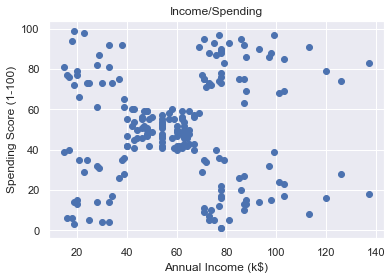

In [15]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Income/Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Note:
    - At first sight looks like there are around 5 clusters.

### Using the elbow method to find the optimal number of clusters

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25047.716267982447,
 21826.936303231654,
 19643.655552199736]

Text(0, 0.5, 'WCSS')

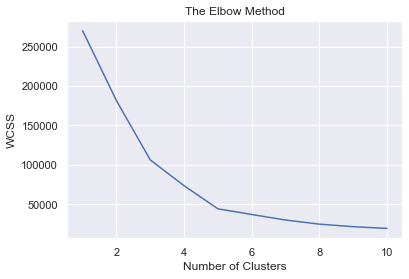

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Note:
    - As we gave hypothesis from first sight, 
    the elbow method confirms that number of clusters are between 3 and 5

### Fitting K-Means to the dataset

In [16]:
kmeans = KMeans(5)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [17]:
data_cluster = data.copy()
data_cluster['Cluster'] = y_kmeans
data_cluster.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Visualising the clusters

Text(0, 0.5, 'Spending Score (1-100)')

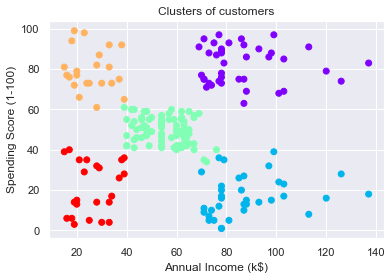

In [26]:
plt.scatter(data_cluster['Annual Income (k$)'], data_cluster['Spending Score (1-100)'], c =data_cluster['Cluster'], cmap = 'rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Note:
     - There are five types of customers:
            1.Customers who earn less and spend less - Red
            2.Customers who earn more and spend less - Blue
            3.Customers who earn average and spend average - Green
            4.Customers who earn less and spend more - Orange
            5.Customers who ear more and spend more - Purple